In [1]:
text = '<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">'

NLP2_1
https://www.hackerrank.com/challenges/detect-the-email-addresses/problem?isFullScreen=true

In [2]:
# Enter your code here. Read input from STDIN. Print output to STDOUT
import re

result = set(re.findall('[0-9A-z_]{1,}@[0-9A-z_]{1,}\.[0-9A-z_]{1,}', text))
result = list(result)
result.sort()
print(';'.join(result))

NLP2_2 https://www.hackerrank.com/challenges/detect-the-domain-name/problem?isFullScreen=true

In [3]:
# Enter your code here. Read input from STDIN. Print output to STDOUT
import re

ls = re.findall('https{0,1}://[a-z.0-9]{1,}[.][a-z.0-9]{1,}[/?"]', text)
ls = list(set([re.sub('[!w]{3}[.]|[/?"]|(https{0,1}:)', '', x) for x in ls]))
ls.sort()
print(';'.join(ls))

w3.org


NLP2_3 Реализовать классификатор токсичных комментариев tfidf на базе датасета
https://www.kaggle.com/datasets/blackmoon/russian-language-toxic-comments

Дубликат файла: https://cloud.mail.ru/public/Z4L3/vB8GcgTtK


In [4]:
import os
import pandas as pd

print(os.getcwd() + '\data')
df = pd.read_csv(os.getcwd() + '\data\labeled.csv')
df['toxic'] = df['toxic'].astype(int)
df.head(10)

C:\Users\16706093\PycharmProjects\School_DS\NLP-3\data


,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1
1,"Хохлы, это отдушина затюканого россиянина, мол...",1
2,Собаке - собачья смерть\n,1
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1
5,Для каких стан является эталоном современная с...,1
6,В шапке были ссылки на инфу по текущему фильму...,0
7,УПАД Т! ТАМ НЕЛЬЗЯ СТРОИТЬ! ТЕХНОЛОГИЙ НЕТ! РА...,1
8,"Ебать тебя разносит, шизик.\n",1
9,"Обосрался, сиди обтекай\n",1


In [5]:
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import snowball
from nltk.corpus import stopwords
from pymorphy2 import MorphAnalyzer
from tqdm import tqdm
tqdm.pandas()


# ф-я проверки слова соответствию пунктуации и стоп-словам
def clean_stopwords(ls_words=[]):
    rus_stem = snowball.SnowballStemmer(language='russian')
    morph = MorphAnalyzer()
    ls_new = []
    if len(ls_words) > 0:
        for word in ls_words:
            # приводим слово к нормальной форме
            morphed = morph.parse(word)[0].normal_form
            # stem_word = rus_stem.stem(morphed)
            # отбираем слова, которые несут смысловую нагрузку
            if morphed not in stopwords.words('russian') and morphed.isalpha():
                ls_new.append(rus_stem.stem(morphed))
    return ls_new

def txt_transform(phrase=''):

    # из комментария составляем список слов
    ls_tokens = tokenizer.tokenize(phrase)
    # возвращаем исходник фразы
    return ' '.join(clean_stopwords(ls_tokens))

# производим обработку исходных комментариев
tokenizer = WordPunctTokenizer()

# так как обработку всего DF занимает около часа, то было решено результат выгрузить в csv
# и если файл присутствует, то не запускать заново его обработку
# если файл отсутствует в папке, то мы его рассчитываем и записываем в csv
if not os.path.exists(os.getcwd() + '\data\cleaned.csv'):
    df['transformed_comments'] = df['comment'].progress_apply(txt_transform)
    # подсчитываем слова
    df['count_words'] = df['transformed_comments'].apply(lambda x: len(x.split(' ')))
    # получаем длину самого длинного комментария
    max_length = df['count_words'].sort_values(ascending=False).to_list()[0]
    df.to_csv(os.getcwd() + '\data\cleaned.csv')
# иначе читаем из файла
else:
    df = pd.read_csv(os.getcwd() + '\data\cleaned.csv', index_col=0)
    df['transformed_comments'] = df['transformed_comments'].astype(str)
    df['comment'] = df['comment'].astype(str)


In [6]:
# ищем дублирующиеся строки, у которых признак токсичности при этом разный
ls_different_duplicates_comments = df[df.duplicated(subset=['transformed_comments', 'toxic'])]['transformed_comments']
# получаем по таким записям список индексов
ls_dif_dup_com_index = df[df['transformed_comments'].isin(ls_different_duplicates_comments)].index.to_list()
# удаляем все такие записи, которые вносят неопределенность
df = df.drop(index=ls_dif_dup_com_index, axis=0)
# из оставшихся записей оставляем только уникальные по трансформированным записям
df = df.drop(index=df[df.duplicated(subset=['transformed_comments'])].index.to_list(), axis=0)

df.head(10)

,comment,toxic,transformed_comments,count_words
0,"Верблюдов-то за что? Дебилы, бл...\n",1,верблюд деб бл,3
1,"Хохлы, это отдушина затюканого россиянина, мол...",1,хохол эт отдушин затюкан россиянин мол вон хох...,13
2,Собаке - собачья смерть\n,1,собак собач смерт,3
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1,страниц обнов деб эт оскорблен доказа факт деб...,16
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1,убед страничн пдф скрипал отрав росс анализиро...,10
5,Для каких стан является эталоном современная с...,1,стан явля эталон современ систем здравоохранен...,10
6,В шапке были ссылки на инфу по текущему фильму...,0,шапк ссылк инф текущ фильм марвест ссылк замен...,27
7,УПАД Т! ТАМ НЕЛЬЗЯ СТРОИТЬ! ТЕХНОЛОГИЙ НЕТ! РА...,1,упад стро технолог разворова трещин пош л туп ...,12
8,"Ебать тебя разносит, шизик.\n",1,еба разнос шизик,3
9,"Обосрался, сиди обтекай\n",1,обосра сидет обтека,3


In [7]:
#
from collections import Counter
# формируем bag of words
bag = Counter(sum(df['transformed_comments'].str.split(' ').to_list(),[]))
# преобразуем в список
bag = list(bag.items())
# производим сортировку по значению из списка 2 (по порядку)
bag.sort(key=lambda x: x[1], reverse=True)

bag[:10]

[('эт', 4843),
 ('все', 2415),
 ('моч', 1599),
 ('год', 1489),
 ('котор', 1381),
 ('ве', 1311),
 ('прост', 1275),
 ('ещ', 1257),
 ('сво', 1080),
 ('человек', 1079)]

In [8]:
import numpy as np
import time
from itertools import combinations_with_replacement

#формируем наборы параметров для подбора
min_df = [1] + list(range(0, 31, 5))[1:]
max_df = list(np.array(np.arange(70,101, 5))/100)
ngram_range = [x for x in combinations_with_replacement(list(range(3))[1:], 2)]

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

#объявляем TF-IDF и логистическую регрессию
logical = LogisticRegression(max_iter=10000, C=3, solver='liblinear')
vectorizer = TfidfVectorizer(analyzer='char_wb')
# создаем pipeline для работы с GridSearchCV
pipeline = Pipeline([('vect', vectorizer), ('clf', logical)])
params = {'vect__min_df': min_df, 'vect__max_df': max_df, 'vect__ngram_range': ngram_range}

grid_search_clf = GridSearchCV(pipeline, params, cv=5, verbose=1, n_jobs=-1, scoring='f1')

#для расчета времени работы подбора параметров
t_start = time.time()
#обучаемся
grid_search_clf.fit(df['transformed_comments'], df['toxic'])
t_end = time.time()

print('')
print(f"Подбор параметров осуществлен за: {time.strftime('%H:%M:%S', time.gmtime(t_end-t_start))}")
print(f"Лучше зачение метрики F1: {grid_search_clf.best_score_} наблюдается при следующих параметрах TF-IDF:")
print(f"{str(grid_search_clf.best_estimator_[0]).replace('TfidfVectorizer', '')[1:-1]}")


Fitting 5 folds for each of 147 candidates, totalling 735 fits

Подбор параметров осуществлен за: 00:03:19
Лучше зачение метрики F1: 0.6969744340128974 наблюдается при следующих параметрах TF-IDF:
analyzer='char_wb', max_df=0.75, ngram_range=(2, 2)


Результат по F1-мере: 0.7175043327556327
Результат по метрике recall: 0.6684607104413348
Результат по метрике precision: 0.7743142144638404
Результат метрики AUC-ROC: 0.7854958371808182

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1857
           1       0.77      0.67      0.72       929

    accuracy                           0.82      2786
   macro avg       0.81      0.79      0.80      2786
weighted avg       0.82      0.82      0.82      2786



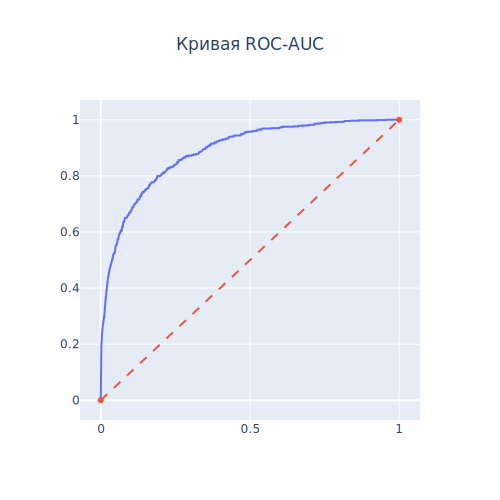

In [11]:

# производим обучение на оптимальных параметрах
from sklearn.metrics import classification_report, f1_score, roc_auc_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import train_test_split

# разбиваем на тренировочную и тестовую выборки
df_train, df_test = train_test_split(
    df[['transformed_comments','toxic']]
    , test_size=0.2
    , train_size=0.8
    , random_state=42)

# объявляем TF-IDF с оптимальными параметрами
vectorizer = grid_search_clf.best_estimator_[0]
X_train = vectorizer.fit_transform(df_train['transformed_comments'])
X_test = vectorizer.transform(df_test['transformed_comments'])
y_train = df_train['toxic']
y_test = df_test['toxic']

# запускаем обучение
logical.fit(X_train, y_train)
y_pred = logical.predict(X_test)

# производим оценки
report = classification_report(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_true=y_test, y_score=y_pred)
print(f'Результат по F1-мере: {f1}')
print(f'Результат по метрике recall: {recall}')
print(f'Результат по метрике precision: {precision}')
print(f"Результат метрики AUC-ROC: {roc_auc}", end='\n\n')


print(report)

# рисуем кривую ROC-AUC
from plotly import graph_objs as go
fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                 y_score=np.array(pd.DataFrame(logical.predict_proba(X_test))[1].to_list()), pos_label=1)
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, showlegend=False))
fig.add_trace(go.Scatter(x=[0,1], y=[0,1], line={'dash': 'dash'}, showlegend=False))
fig.update_layout(width=500, height=500, title='Кривая ROC-AUC', title_x=0.5)
import plotly.io as pio
pio.renderers.default = "svg"
fig.show()